In [1]:
# Basic Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for scaling
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# importing model instance
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.linear_model import Lasso, Ridge


# for ploting decision tree
from sklearn.tree import plot_tree

# for sampling
from imblearn.over_sampling import SMOTE, RandomOverSampler

# for hyperparameter Tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# for spilitting dataset
from sklearn.model_selection import train_test_split

# model evalution for regression
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

# normality of data
from scipy.stats import shapiro,kstest,normaltest
import statsmodels.api as sm  # QQ plot

# importing evalutionary parameters for classification
# from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# from sklearn.metrics import plot_confusion_matrix



# To ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# Problem Statement

In [2]:
# To predict charges for medical insurance

# Data Gathering 

In [3]:
df = pd.read_csv('medicalpremium.csv')
df

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
0,45,0,0,0,0,155,57,0,0,0,25000
1,60,1,0,0,0,180,73,0,0,0,29000
2,36,1,1,0,0,158,59,0,0,1,23000
3,52,1,1,0,1,183,93,0,0,2,28000
4,38,0,0,0,1,166,88,0,0,1,23000
...,...,...,...,...,...,...,...,...,...,...,...
981,18,0,0,0,0,169,67,0,0,0,15000
982,64,1,1,0,0,153,70,0,0,3,28000
983,56,0,1,0,0,155,71,0,0,1,29000
984,47,1,1,0,0,158,73,1,0,1,39000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 986 entries, 0 to 985
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype
---  ------                   --------------  -----
 0   Age                      986 non-null    int64
 1   Diabetes                 986 non-null    int64
 2   BloodPressureProblems    986 non-null    int64
 3   AnyTransplants           986 non-null    int64
 4   AnyChronicDiseases       986 non-null    int64
 5   Height                   986 non-null    int64
 6   Weight                   986 non-null    int64
 7   KnownAllergies           986 non-null    int64
 8   HistoryOfCancerInFamily  986 non-null    int64
 9   NumberOfMajorSurgeries   986 non-null    int64
 10  PremiumPrice             986 non-null    int64
dtypes: int64(11)
memory usage: 84.9 KB


In [5]:
df.describe()

,Age,Diabetes,BloodPressureProblems,AnyTransplants,AnyChronicDiseases,Height,Weight,KnownAllergies,HistoryOfCancerInFamily,NumberOfMajorSurgeries,PremiumPrice
count,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000,986.000000
mean,41.745436,0.419878,0.468560,0.055781,0.180527,168.182556,76.950304,0.215010,0.117647,0.667343,24336.713996
std,13.963371,0.493789,0.499264,0.229615,0.384821,10.098155,14.265096,0.411038,0.322353,0.749205,6248.184382
min,18.000000,0.000000,0.000000,0.000000,0.000000,145.000000,51.000000,0.000000,0.000000,0.000000,15000.000000
25%,30.000000,0.000000,0.000000,0.000000,0.000000,161.000000,67.000000,0.000000,0.000000,0.000000,21000.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,168.000000,75.000000,0.000000,0.000000,1.000000,23000.000000
75%,53.000000,1.000000,1.000000,0.000000,0.000000,176.000000,87.000000,0.000000,0.000000,1.000000,28000.000000
max,66.000000,1.000000,1.000000,1.000000,1.000000,188.000000,132.000000,1.000000,1.000000,3.000000,40000.000000


In [6]:
# Initialize all the lists
model_lst = []
Testing_accuracy = []
Training_accuracy = []

# EDA(Exploratory Data Analysis)

# Checking missing values

In [7]:
df.isna().sum()

Age                        0
Diabetes                   0
BloodPressureProblems      0
AnyTransplants             0
AnyChronicDiseases         0
Height                     0
Weight                     0
KnownAllergies             0
HistoryOfCancerInFamily    0
NumberOfMajorSurgeries     0
PremiumPrice               0
dtype: int64

In [8]:
df['Age']

0      45
1      60
2      36
3      52
4      38
       ..
981    18
982    64
983    56
984    47
985    21
Name: Age, Length: 986, dtype: int64

In [9]:
df['Diabetes']

0      0
1      1
2      1
3      1
4      0
      ..
981    0
982    1
983    0
984    1
985    0
Name: Diabetes, Length: 986, dtype: int64

In [10]:
df['BloodPressureProblems']

0      0
1      0
2      1
3      1
4      0
      ..
981    0
982    1
983    1
984    1
985    0
Name: BloodPressureProblems, Length: 986, dtype: int64

In [11]:
df['AnyTransplants']

0      0
1      0
2      0
3      0
4      0
      ..
981    0
982    0
983    0
984    0
985    0
Name: AnyTransplants, Length: 986, dtype: int64

In [12]:
df['AnyChronicDiseases']

0      0
1      0
2      0
3      1
4      1
      ..
981    0
982    0
983    0
984    0
985    0
Name: AnyChronicDiseases, Length: 986, dtype: int64

In [13]:
df['Weight']

0      57
1      73
2      59
3      93
4      88
       ..
981    67
982    70
983    71
984    73
985    75
Name: Weight, Length: 986, dtype: int64

In [14]:
df['Height']

0      155
1      180
2      158
3      183
4      166
      ... 
981    169
982    153
983    155
984    158
985    158
Name: Height, Length: 986, dtype: int64

In [15]:
df['KnownAllergies']

0      0
1      0
2      0
3      0
4      0
      ..
981    0
982    0
983    0
984    1
985    1
Name: KnownAllergies, Length: 986, dtype: int64

In [16]:
df['HistoryOfCancerInFamily']

0      0
1      0
2      0
3      0
4      0
      ..
981    0
982    0
983    0
984    0
985    0
Name: HistoryOfCancerInFamily, Length: 986, dtype: int64

In [17]:
df['NumberOfMajorSurgeries']

0      0
1      0
2      1
3      2
4      1
      ..
981    0
982    3
983    1
984    1
985    1
Name: NumberOfMajorSurgeries, Length: 986, dtype: int64

# Outlier detection

<AxesSubplot:>

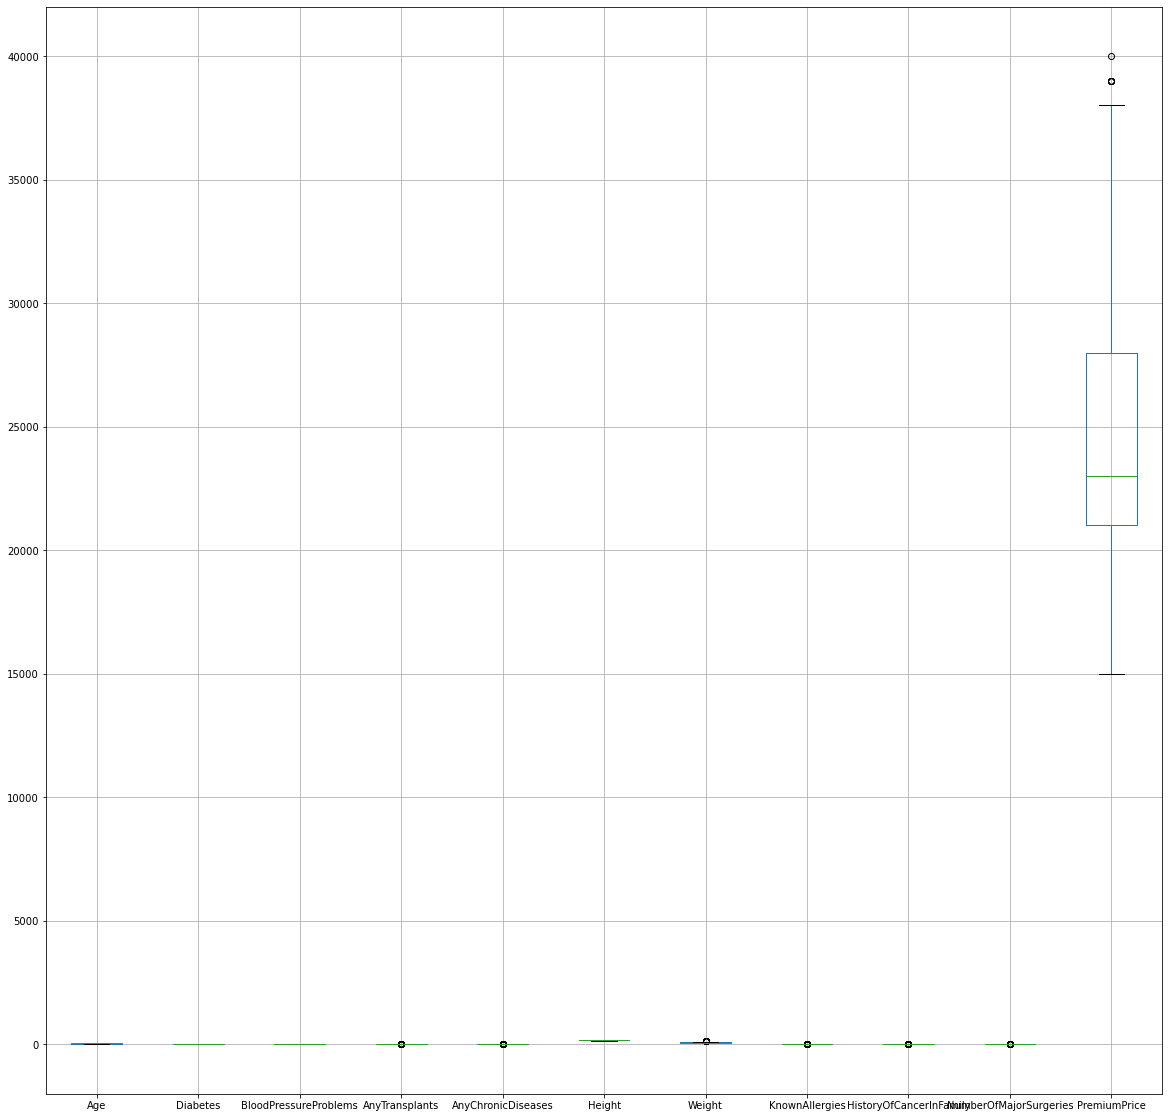

In [18]:
# ### Check outliers
plt.figure(figsize=(20,20))
df.boxplot()

<AxesSubplot:>

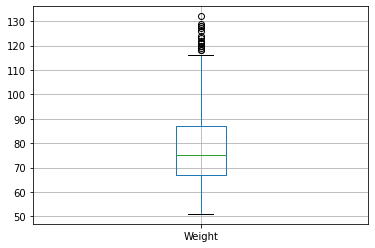

In [19]:
df.boxplot(['Weight'])

 first quartile :- 67.0 
 second qurartile :- 75.0 
 Third quartile :- 87.0
 IQR :- 20.0
 Uppertail :- 117.0
 Lowertail :- 37.0
75.0


<AxesSubplot:>

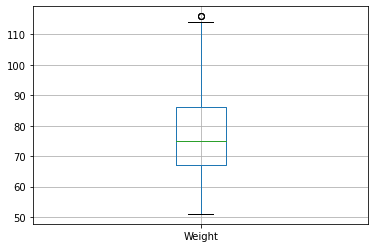

In [20]:
q1 = df['Weight'].quantile(0.25)
q2 = df['Weight'].quantile(0.50)
q3 = df['Weight'].quantile(0.75)
IQR = q3-q1
uppertail = q3+1.5*IQR
lowertail = q1-1.5*IQR
print(' first quartile :-',q1,"\n second qurartile :-",q2,"\n Third quartile :-",q3)
print(' IQR :-',IQR)
print(' Uppertail :-',uppertail)
print(" Lowertail :-",lowertail)


size_df=df[['Weight']].loc[(df['Weight'] < uppertail) & (df['Weight'] > lowertail)].median()[0]
print(size_df)  

df.loc[(df['Weight'] > uppertail) | (df['Weight'] < lowertail), 'Weight'] = size_df
df[['Weight']].boxplot()

## Model Training

In [21]:
x = df.drop('PremiumPrice',axis = 1)
y = df['PremiumPrice']

In [22]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=6)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(739, 10)
(247, 10)
(739,)
(247,)


# LinearRegression

## Model Evaluation On Linear Reg

In [23]:
model_name="linear_model"
model_lst.append(model_name)
print(model_lst)

['linear_model']


In [24]:
lin_reg_model = LinearRegression()
lin_reg_model.fit(x_train,y_train)

LinearRegression()

### Training data

In [25]:
y_train_pred = lin_reg_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 13723995.011027304
------------------------------------------------------------------------------------
rmse--> 3704.5910720384923
------------------------------------------------------------------------------------
mae--> 2646.649865140307
------------------------------------------------------------------------------------
r2_score--> 0.6520434794465406


### Testing data

In [26]:
y_test_pred = lin_reg_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 14838956.926614013
------------------------------------------------------------------------------------
rmse--> 3852.1366702927367
------------------------------------------------------------------------------------
mae--> 2679.829529994939
------------------------------------------------------------------------------------
r2_score--> 0.6056095262853842


## Lasso Model

In [27]:
lasso_lin_model = Lasso(alpha=1.0)
lasso_lin_model.fit(x_train,y_train)
model_lst.append("Lasso Regression")

In [28]:
#Training Data

y_train_pred = lasso_lin_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 13724048.639273886
------------------------------------------------------------------------------------
rmse--> 3704.598310110542
------------------------------------------------------------------------------------
mae--> 2646.8712659585717
------------------------------------------------------------------------------------
r2_score--> 0.6520421197624202


In [29]:
# Testing data

y_test_pred = lasso_lin_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 14842118.112589775
------------------------------------------------------------------------------------
rmse--> 3852.546964358744
------------------------------------------------------------------------------------
mae--> 2679.9948215159447
------------------------------------------------------------------------------------
r2_score--> 0.6055255081403996


## Lasso Hyperparameter tunning

### 1. GridsearchCV

In [30]:
gscv_lasso = Lasso()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_model = GridSearchCV(gscv_lasso,param_grid)
gscv_model.fit(x_train,y_train)
gscv_model.best_estimator_

Lasso(alpha=2.9899999999999998)

In [31]:
gscv_lasso_model = Lasso(alpha=0.27)
gscv_lasso_model.fit(x_train,y_train)
model_lst.append("gscv_lasso_model")

In [32]:
# Training data

y_train_pred = gscv_lasso_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 13723998.924391609
------------------------------------------------------------------------------------
rmse--> 3704.59160021609
------------------------------------------------------------------------------------
mae--> 2646.7097958142463
------------------------------------------------------------------------------------
r2_score--> 0.6520433802275722


In [33]:
# Testing data

y_test_pred = gscv_lasso_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 14839798.836200489
------------------------------------------------------------------------------------
rmse--> 3852.2459470029285
------------------------------------------------------------------------------------
mae--> 2679.8740425563396
------------------------------------------------------------------------------------
r2_score--> 0.6055871499740116


## 2. RandomsearchCV

In [34]:
rscv_lasso = Lasso()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
rscv_rig_model = RandomizedSearchCV(rscv_lasso,param_grid)
rscv_rig_model.fit(x_train,y_train)
rscv_rig_model.best_estimator_

Lasso(alpha=2.98)

In [35]:
rscv_lasso_model = Lasso(alpha=0.26)
rscv_lasso_model.fit(x_train,y_train)
model_lst.append('RSCV_Lasso_model')

In [36]:
# training data

y_train_pred = rscv_lasso_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 13723998.639234746
------------------------------------------------------------------------------------
rmse--> 3704.59156172914
------------------------------------------------------------------------------------
mae--> 2646.707560107886
------------------------------------------------------------------------------------
r2_score--> 0.652043387457405


In [37]:
#Testing data

y_test_pred = rscv_lasso_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 14839767.651746456
------------------------------------------------------------------------------------
rmse--> 3852.2418994329078
------------------------------------------------------------------------------------
mae--> 2679.872409074577
------------------------------------------------------------------------------------
r2_score--> 0.6055879787958526


# Ridge Regression

In [38]:
ridge_lin_model = Ridge(alpha=1.0)
ridge_lin_model.fit(x_train,y_train)
model_lst.append("Ridge Regression")

In [39]:
# training data

y_train_pred = ridge_lin_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 13726509.251408722
------------------------------------------------------------------------------------
rmse--> 3704.930397646995
------------------------------------------------------------------------------------
mae--> 2649.407928277181
------------------------------------------------------------------------------------
r2_score--> 0.6519797336979993


In [40]:
# testing Data

y_test_pred = ridge_lin_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 14827949.680892808
------------------------------------------------------------------------------------
rmse--> 3850.7076857238603
------------------------------------------------------------------------------------
mae--> 2682.202728711425
------------------------------------------------------------------------------------
r2_score--> 0.6059020773639909


## Ridge Hyperparameter tunning

### 1. GridsearchCV

In [41]:
gscv_ridge = Ridge()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
gscv_model = GridSearchCV(gscv_ridge,param_grid)
gscv_model.fit(x_train,y_train)
gscv_model.best_estimator_

Ridge(alpha=0.76)

In [42]:
gscv_ridge_model = Ridge(alpha=0.44)
gscv_ridge_model.fit(x_train,y_train)
model_lst.append("GSCV_Ridge")

In [43]:
# training Data

y_train_pred = gscv_ridge_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 13724496.119268028
------------------------------------------------------------------------------------
rmse--> 3704.6587048293704
------------------------------------------------------------------------------------
mae--> 2647.765952900073
------------------------------------------------------------------------------------
r2_score--> 0.6520307744084141


In [44]:
# testing data

y_test_pred = gscv_ridge_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 14833212.423168333
------------------------------------------------------------------------------------
rmse--> 3851.3909725147787
------------------------------------------------------------------------------------
mae--> 2680.8862019381177
------------------------------------------------------------------------------------
r2_score--> 0.6057622039598597


### 2. RandomsearchCV

In [45]:
rscv_ridge = Ridge()
param_grid = {"alpha":np.arange(0.01,3,0.01)}
rscv_rig_model = RandomizedSearchCV(rscv_ridge,param_grid)
rscv_rig_model.fit(x_train,y_train)
rscv_rig_model.best_estimator_

Ridge(alpha=0.5800000000000001)

In [46]:
rscv_ridge_model = Ridge(alpha=0.66)
rscv_ridge_model.fit(x_train,y_train)
model_lst.append('RSCV_Ridge')

In [47]:
# training data

y_train_pred = rscv_ridge_model.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 13725109.647635197
------------------------------------------------------------------------------------
rmse--> 3704.741508882259
------------------------------------------------------------------------------------
mae--> 2648.399446090616
------------------------------------------------------------------------------------
r2_score--> 0.652015219083909


In [48]:
# testing data

y_test_pred = rscv_ridge_model.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 14830880.135907764
------------------------------------------------------------------------------------
rmse--> 3851.088175556068
------------------------------------------------------------------------------------
mae--> 2681.4071320236712
------------------------------------------------------------------------------------
r2_score--> 0.6058241915970017


# Normality of Residual

In [49]:
residual = y_test  - y_test_pred
residual

432   -2097.876274
686   -2041.326215
635    1982.436573
785     699.929226
232    2282.823434
          ...     
32    -3562.858042
666   -1686.284193
478    -106.299934
736   -1453.800840
884    3232.233493
Name: PremiumPrice, Length: 247, dtype: float64

### 1. kde

0.6348952629696017

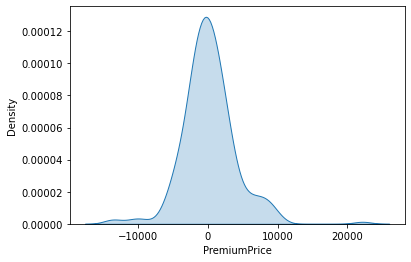

In [50]:
sns.kdeplot(residual,fill=True)
residual.skew()

<AxesSubplot:xlabel='PremiumPrice', ylabel='Density'>

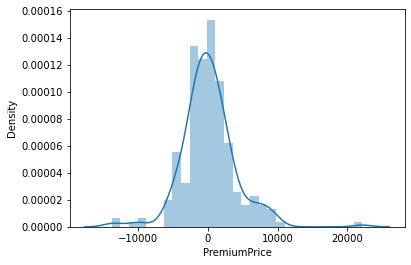

In [51]:
sns.distplot(residual)

### 2. Q-Q plot

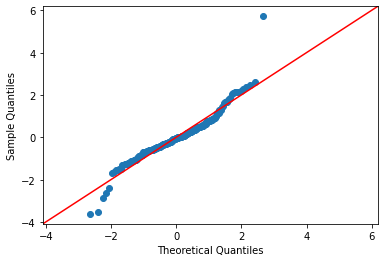

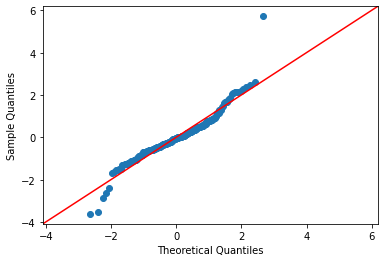

In [52]:
#import statsmodels.api as sm
sm.qqplot(residual,line="45",fit=True)

## 3. Hypothesis test

### 1. Shapiro test

In [53]:
from scipy.stats import shapiro
_,p_val = shapiro(residual)
print("p_val -->",p_val)
scientific_value = 0.05
if p_val > 0.05:
    print("Data is normally distributed")
else:
    print("data is not normally distributed")

p_val --> 2.4283264288271766e-09
data is not normally distributed


### 2. ks test

In [54]:
from scipy.stats import kstest
_,p_val = kstest(residual,"norm")
print("p_val -->",p_val)
scientific_value = 0.05
if p_val > 0.05:
    print("Data is normally distributed")
else:
    print("data is not normally distributed")

p_val --> 4.022686792053197e-58
data is not normally distributed


# Model Training On KNN

In [55]:
KNN_reg = KNeighborsRegressor()
KNN_reg.fit(x_train,y_train)
model_lst.append("KNN_regression")

In [56]:
# training data 

y_train_pred = KNN_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 12610987.821380243
------------------------------------------------------------------------------------
rmse--> 3551.1952665800063
------------------------------------------------------------------------------------
mae--> 2250.067658998647
------------------------------------------------------------------------------------
r2_score--> 0.6802625300035683


In [57]:
#Testing data

y_test_pred = KNN_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 18616680.16194332
------------------------------------------------------------------------------------
rmse--> 4314.705107182102
------------------------------------------------------------------------------------
mae--> 2753.0364372469635
------------------------------------------------------------------------------------
r2_score--> 0.5052050259075935


# Hyperparameter Tunning

In [58]:
# Estimator
knn_reg = KNeighborsRegressor()

# param_grid
hyperparameters = {"n_neighbors" : np.arange(3,30),
                  "p": [1,2]}

gscv_knn_reg = GridSearchCV(knn_reg, hyperparameters, cv = 5)
gscv_knn_reg.fit(x_train, y_train)
gscv_knn_reg.best_estimator_

model_lst.append("KNN_with_hypr")

In [59]:
knn_reg = gscv_knn_reg.best_estimator_

best_params = gscv_knn_reg.best_estimator_
best_params

KNeighborsRegressor(n_neighbors=15, p=1)

In [60]:
# Training Data

y_train_pred = knn_reg.predict(x_train)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 14511604.270034581
------------------------------------------------------------------------------------
rmse--> 3809.4099635028233
------------------------------------------------------------------------------------
mae--> 2484.528642309427
------------------------------------------------------------------------------------
r2_score--> 0.6320745289259628


In [61]:
# testing data

y_test_pred = knn_reg.predict(x_test)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 17144003.59874044
------------------------------------------------------------------------------------
rmse--> 4140.531801440539
------------------------------------------------------------------------------------
mae--> 2632.6585695006747
------------------------------------------------------------------------------------
r2_score--> 0.5443458907448181


# Scaling

## Normalization

In [62]:
normal_scalar = MinMaxScaler()

normal_scalar.fit(x_train)

MinMaxScaler()

In [63]:
# To get training accuracy

array = normal_scalar.transform(x_train)  # Actual application the formalae
x_train_normal = pd.DataFrame(array, columns=x_train.columns)

# Model Training
norm_knn_reg = KNeighborsRegressor()  # n_neighbour = 5, P= 2
norm_knn_reg.fit(x_train_normal, y_train)
model_lst.append("knn_with_normal_scale")

In [64]:
# trainig Data

y_train_pred = norm_knn_reg.predict(x_train_normal)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 10958538.565629229
------------------------------------------------------------------------------------
rmse--> 3310.3683428931636
------------------------------------------------------------------------------------
mae--> 2172.3951285520975
------------------------------------------------------------------------------------
r2_score--> 0.7221585298899189


In [65]:
# testing data

array = normal_scalar.transform(x_test)
x_test_normal = pd.DataFrame(array, columns=x_test.columns)
y_test_pred = norm_knn_reg.predict(x_test_normal)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 20005506.072874494
------------------------------------------------------------------------------------
rmse--> 4472.751510298162
------------------------------------------------------------------------------------
mae--> 2699.595141700405
------------------------------------------------------------------------------------
r2_score--> 0.46829274752926


### standardization

In [66]:
std_scalar = StandardScaler()

std_scalar.fit(x_train)

StandardScaler()

In [67]:
# To get training accuracy

array = std_scalar.transform(x_train)  # Actual application the formalae
x_train_std = pd.DataFrame(array, columns=x_train.columns)

# Model Training
std_knn_reg = KNeighborsRegressor()  # n_neighbour = 5, P= 2  #knn_reg_1=knn_reg --->changing name
std_knn_reg.fit(x_train_std, y_train)

model_lst.append("knn_with_std_scale")

In [68]:
# training data

y_train_pred = std_knn_reg.predict(x_train_std)

mse = mean_squared_error(y_train,y_train_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_train,y_train_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_train,y_train_pred)
print('r2_score-->',r2)

Training_accuracy.append(r2)

mse--> 11598646.820027063
------------------------------------------------------------------------------------
rmse--> 3405.678613731346
------------------------------------------------------------------------------------
mae--> 2231.3937753721243
------------------------------------------------------------------------------------
r2_score--> 0.7059293021177684


In [69]:
# testing data

array = std_scalar.transform(x_test)
x_test_std = pd.DataFrame(array, columns=x_test.columns)
y_test_pred = std_knn_reg.predict(x_test_std)

mse = mean_squared_error(y_test,y_test_pred)
print("mse-->",mse)
print('-'*84)

rmse = np.sqrt(mse)
print("rmse-->",rmse)
print('-'*84)

mae = mean_absolute_error(y_test,y_test_pred)
print("mae-->",mae)
print('-'*84)

r2 = r2_score(y_test,y_test_pred)
print('r2_score-->',r2)

Testing_accuracy.append(r2)

mse--> 20979919.028340083
------------------------------------------------------------------------------------
rmse--> 4580.384157288566
------------------------------------------------------------------------------------
mae--> 2757.085020242915
------------------------------------------------------------------------------------
r2_score--> 0.4423947555746851


## Decision Tree Regression

In [70]:
DT_model = DecisionTreeRegressor(random_state=0) 
DT_model.fit(x_train,y_train)
model_lst.append('Desicion Tree')

In [71]:
# Testing Dataset
y_pred = DT_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('-'*50)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*50)
mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('-'*50)
r2 = r2_score(y_test, y_pred)
print("r2_score-->",r2)
Testing_accuracy.append(r2)

MSE : 11724696.356275303
--------------------------------------------------
RMSE : 3424.134395183008
--------------------------------------------------
MAE : 947.3684210526316
--------------------------------------------------
r2_score--> 0.6883804857052991


In [72]:
# Training Data Set
y_pred_train = DT_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*50)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*50)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*50)
r2 = r2_score(y_train, y_pred_train)
print("r2_score-->",r2)
Training_accuracy.append(r2)

MSE : 0.0
--------------------------------------------------
RMSE : 0.0
--------------------------------------------------
MAE : 0.0
--------------------------------------------------
r2_score--> 1.0


### DT with Hyperparameter

In [73]:
dt_model = DecisionTreeRegressor()

hyperparameter = {'criterion':['absolute_error', 'squared_error'],
                 'max_depth':np.arange(3,8),
                 'min_samples_split': np.arange(2,20),
                 'min_samples_leaf':np.arange(2,15)}

gscv_dt_clf = GridSearchCV(dt_model, hyperparameter, cv = 5)
gscv_dt_clf.fit(x_train, y_train)
gscv_dt_clf.best_estimator_
model_lst.append("Decision tree with hyperparameter")

In [74]:
# Testing Accuracy
dt_model.fit(x_train, y_train)
y_pred = dt_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('-'*90)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*90)
mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('-'*90)
r2 = r2_score(y_test, y_pred)
print("r2_score-->",r2)
Testing_accuracy.append(r2)

MSE : 10291497.975708501
------------------------------------------------------------------------------------------
RMSE : 3208.036467328341
------------------------------------------------------------------------------------------
MAE : 825.9109311740891
------------------------------------------------------------------------------------------
r2_score--> 0.7264720976045823


In [75]:
# Training accuracy
y_pred_train = dt_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*90)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*90)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*90)
r2 = r2_score(y_train, y_pred_train)
print("r2_score-->",r2)
Training_accuracy.append(r2)

MSE : 0.0
------------------------------------------------------------------------------------------
RMSE : 0.0
------------------------------------------------------------------------------------------
MAE : 0.0
------------------------------------------------------------------------------------------
r2_score--> 1.0


### Prunning

In [76]:
decision_tree_model = DecisionTreeRegressor(random_state=0)
decision_tree_model.fit(x_train, y_train)
model_lst.append("Decision tree with Prunning")

In [77]:
result = decision_tree_model.cost_complexity_pruning_path(x_train,y_train)
ccp_alpha_list = result["ccp_alphas"]


In [78]:
train_accuracy_list = []
test_accuracy_list = []

for i in ccp_alpha_list:
    decision_tree_model = DecisionTreeRegressor(ccp_alpha= i,random_state=10)
    decision_tree_model.fit(x_train, y_train)
    
    training_accuracy = decision_tree_model.score(x_train, y_train)
    train_accuracy_list.append(training_accuracy)
    
    testing_Accuracy = decision_tree_model.score(x_test, y_test)
    test_accuracy_list.append(testing_Accuracy)
    
# test_accuracy_list
# train_accuracy_list

In [79]:
index_ccp = test_accuracy_list.index(max(test_accuracy_list))
index_ccp

52

In [80]:
best_ccp = ccp_alpha_list[index_ccp]

In [81]:
decision_tree_model = DecisionTreeRegressor(ccp_alpha= best_ccp,random_state=10)
decision_tree_model.fit(x_train, y_train)

DecisionTreeRegressor(ccp_alpha=208216.86879589118, random_state=10)

In [82]:
decision_tree_model = DecisionTreeRegressor(ccp_alpha= best_ccp,random_state=10)
decision_tree_model.fit(x_train, y_train)

# Testing Accuracy
decision_tree_model.fit(x_train, y_train)
y_pred = decision_tree_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('-'*90)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*90)
mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('-'*90)
r2 = r2_score(y_test, y_pred)
print("r2_score-->",r2)
Testing_accuracy.append(r2)

MSE : 9100589.480437776
------------------------------------------------------------------------------------------
RMSE : 3016.7183296485896
------------------------------------------------------------------------------------------
MAE : 1179.9279726484256
------------------------------------------------------------------------------------------
r2_score--> 0.7581241178862905


In [83]:
# Training accuracy
y_pred_train = decision_tree_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*90)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*90)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*90)
r2 = r2_score(y_train, y_pred_train)
print("r2_score-->",r2)
Training_accuracy.append(r2)

MSE : 5157729.909655732
------------------------------------------------------------------------------------------
RMSE : 2271.0636075759157
------------------------------------------------------------------------------------------
MAE : 981.5141428087476
------------------------------------------------------------------------------------------
r2_score--> 0.8692315355786494


# Random forest Regression

In [84]:
RF_model = RandomForestRegressor(random_state=0) 
RF_model.fit(x_train,y_train)
model_lst.append("Random Forest Regression")

In [85]:
# Testing Dataset
y_pred = RF_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('-'*50)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*50)
mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('-'*50)
r2 = r2_score(y_test, y_pred)
print("r2_score-->",r2)
Testing_accuracy.append(r2)

MSE : 8146939.676113361
--------------------------------------------------
RMSE : 2854.2844420473166
--------------------------------------------------
MAE : 1081.8218623481782
--------------------------------------------------
r2_score--> 0.7834702658632278


In [86]:
# training Data Set
y_pred_train = RF_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*50)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*50)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*50)
r2 = r2_score(y_train, y_pred_train)
print("r2_score-->",r2)
Training_accuracy.append(r2)

MSE : 1142765.0879566981
--------------------------------------------------
RMSE : 1069.0019120453892
--------------------------------------------------
MAE : 396.6711772665765
--------------------------------------------------
r2_score--> 0.9710264712646806


### # Hyperparameter Tunning for RF

In [87]:
# Hyperparameter Tunning for RF

rf_model = RandomForestRegressor(random_state=1, n_jobs=-1)

hyperparameters = {'n_estimators':np.arange(10,200),
                   "criterion":["squared_error","absolute_error"],
                   'max_depth':np.arange(3,8),
                   'min_samples_split':np.arange(2,20),
                   'min_samples_leaf':np.arange(3,10),
                   'max_features':['sqrt','log2'],
                   'oob_score':[True]}

rscv_rf_model = RandomizedSearchCV(rf_model, hyperparameters, cv=5)
rscv_rf_model.fit(x_train, y_train)
rscv_rf_model.best_estimator_

RandomForestRegressor(max_depth=7, max_features='log2', min_samples_leaf=6,
                      min_samples_split=3, n_estimators=129, n_jobs=-1,
                      oob_score=True, random_state=1)

In [88]:
# Testing Accuracy
model_lst.append("RF with Hyperparameter")
y_pred = rscv_rf_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('-'*90)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*90)
mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('-'*90)
r2 = r2_score(y_test, y_pred)
print("r2_score-->",r2)
Testing_accuracy.append(r2)

MSE : 11307291.51846505
------------------------------------------------------------------------------------------
RMSE : 3362.6316358568106
------------------------------------------------------------------------------------------
MAE : 2233.1711594285352
------------------------------------------------------------------------------------------
r2_score--> 0.6994742905144167


In [89]:
# Training accuracy
y_pred_train = rscv_rf_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*90)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*90)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*90)
r2 = r2_score(y_train, y_pred_train)
print("r2_score-->",r2)
Training_accuracy.append(r2)

MSE : 8855385.76052953
------------------------------------------------------------------------------------------
RMSE : 2975.8000202516178
------------------------------------------------------------------------------------------
MAE : 1975.4763345354622
------------------------------------------------------------------------------------------
r2_score--> 0.7754816134138294


# Adaboost Regression

In [90]:
AD_model = AdaBoostRegressor(random_state=0) 
AD_model.fit(x_train,y_train)
model_lst.append('Adaboost Regression')

In [91]:
# Testing Dataset
y_pred = AD_model.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('-'*50)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*50)
mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('-'*50)
r2= r2_score(y_test, y_pred)
print("r2_score-->",r2)
Testing_accuracy.append(r2)

MSE : 18677210.96803839
--------------------------------------------------
RMSE : 4321.713892431843
--------------------------------------------------
MAE : 2975.813164095798
--------------------------------------------------
r2_score--> 0.5035962353835544


In [92]:
# training Data Set
y_pred_train = AD_model.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*50)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*50)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*50)
r2= r2_score(y_train, y_pred_train)
print("r2_score-->",r2)
Training_accuracy.append(r2)

MSE : 14470160.76364498
--------------------------------------------------
RMSE : 3803.966451435262
--------------------------------------------------
MAE : 2773.914150554878
--------------------------------------------------
r2_score--> 0.6331252826074727


### Hyperparameter Tunning for AdaBoost

In [93]:
adb_reg = AdaBoostRegressor(random_state=0)

hyperparameter = {"n_estimators":np.arange(10, 100),
                    "learning_rate":np.arange(0, 2, 0.001)}

rscv_reg = RandomizedSearchCV(adb_reg, hyperparameter, cv=5)
rscv_reg.fit(x_train, y_train)
rscv_reg.best_estimator_

AdaBoostRegressor(learning_rate=0.304, n_estimators=18, random_state=0)

In [94]:
adb_reg = rscv_reg.best_estimator_
adb_reg.fit(x_train, y_train)

AdaBoostRegressor(learning_rate=0.304, n_estimators=18, random_state=0)

In [95]:
# Testing Accuracy
model_lst.append("Adaboost with Hyperparameter")
y_pred = adb_reg.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
print("MSE :",mse)
print('-'*90)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*90)
mae = mean_absolute_error(y_test, y_pred)
print("MAE :",mae)
print('-'*90)
r2 = r2_score(y_test, y_pred)
print("r2_score-->",r2)
Testing_accuracy.append(r2)

MSE : 15009393.145194922
------------------------------------------------------------------------------------------
RMSE : 3874.19580625385
------------------------------------------------------------------------------------------
MAE : 2676.942817305489
------------------------------------------------------------------------------------------
r2_score--> 0.6010796646976271


In [96]:
# Training accuracy
y_pred_train = adb_reg.predict(x_train)

mse = mean_squared_error(y_train, y_pred_train)
print("MSE :",mse)
print('-'*90)
rmse = np.sqrt(mse)
print("RMSE :",rmse)
print('-'*90)
mae = mean_absolute_error(y_train, y_pred_train)
print("MAE :",mae)
print('-'*90)
r2 = r2_score(y_train, y_pred_train)
print("r2_score-->",r2)
Training_accuracy.append(r2)

MSE : 11103960.39359715
------------------------------------------------------------------------------------------
RMSE : 3332.2605530776177
------------------------------------------------------------------------------------------
MAE : 2427.0581259429673
------------------------------------------------------------------------------------------
r2_score--> 0.718471522336245


## Display all model with accuracy

In [97]:
print(len(model_lst))
print(len(Testing_accuracy))
print(len(Training_accuracy))

18
18
18


In [98]:
Final_DF= pd.DataFrame({"Model_Details":model_lst,
"Testing_Accuracy":Testing_accuracy,
"Training_Accuracy":Training_accuracy})
Final_DF

,Model_Details,Testing_Accuracy,Training_Accuracy
0,linear_model,0.605610,0.652043
1,Lasso Regression,0.605526,0.652042
2,gscv_lasso_model,0.605587,0.652043
3,RSCV_Lasso_model,0.605588,0.652043
4,Ridge Regression,0.605902,0.651980
5,GSCV_Ridge,0.605762,0.652031
6,RSCV_Ridge,0.605824,0.652015
7,KNN_regression,0.505205,0.680263
8,KNN_with_hypr,0.544346,0.632075
9,knn_with_normal_scale,0.468293,0.722159


I got best Accuracy on random forest with hyperparametric tuning which is for Testing_Accuracy=0.69 and 
Traning_Accuracy=0.77 we use random forest With Hayperparameric Tunning for further calculation.

# Training on single row

In [99]:
columns_name=x.columns
columns_name

Index(['Age', 'Diabetes', 'BloodPressureProblems', 'AnyTransplants',
       'AnyChronicDiseases', 'Height', 'Weight', 'KnownAllergies',
       'HistoryOfCancerInFamily', 'NumberOfMajorSurgeries'],
      dtype='object')

In [102]:
x.head(1).T

,0
Age,45
Diabetes,0
BloodPressureProblems,0
AnyTransplants,0
AnyChronicDiseases,0
Height,155
Weight,57
KnownAllergies,0
HistoryOfCancerInFamily,0
NumberOfMajorSurgeries,0


In [108]:
#user input
Age = 55
Diabetes = 0
BloodPressureProblems = 1
AnyTransplants = 0
AnyChronicDiseases = 0
Height = 160
Weight = 60
KnownAllergies = 0
HistoryOfCancerInFamily = 0
NumberOfMajorSurgeries = 1

In [109]:
project_data={'columns':list(columns_name)}
project_data

{'columns': ['Age',
  'Diabetes',
  'BloodPressureProblems',
  'AnyTransplants',
  'AnyChronicDiseases',
  'Height',
  'Weight',
  'KnownAllergies',
  'HistoryOfCancerInFamily',
  'NumberOfMajorSurgeries']}

In [110]:
array=np.zeros(len(columns_name))
array

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

In [112]:
array[0]=Age
array[1]=Diabetes
array[2]=BloodPressureProblems
array[3]=AnyTransplants
array[4]=AnyChronicDiseases
array[5]=Height
array[6]=Weight
array[7]=KnownAllergies
array[8]=HistoryOfCancerInFamily
array[9]=NumberOfMajorSurgeries

array

array([ 55.,   0.,   1.,   0.,   0., 160.,  60.,   0.,   0.,   1.])

### Now we choose Random Forest as it gives proper accuracy

In [113]:
charges=rscv_rf_model.predict([array])[0]
print('Premium_price of Insurance is:','\u20B9',round(charges,2))

Premium_price of Insurance is: ₹ 26481.33


In [114]:
import json

with open("project_data.json", "w") as f:
    json.dump(project_data, f)

In [ ]:
import pickle

with open("best_model.pkl", "wb") as f:
    pickle.dump(rscv_rf_model, f)